**비지도 학습**: 훈련 데이터에 타깃이 없기 때문에 외부의 도움 없이 스스로 유용한 무언가를 학습해야 한다.

#6-1. 군집 알고리즘

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2024-12-19 05:28:06--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-12-19 05:28:07--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-12-19 05:28:07--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... con

- wget 명령은 원격 주소에서 데이터를 다운로드하여 저장한다.
- -0 옵션에서 저장할 파일 이름을 지정한다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fruits = np.load('fruits_300.npy')
print(fruits.shape)

(300, 100, 100)


- 첫 번째 차원(300)은 샘플의 개수,
- 두 번째 차원(100)은 이미지 높이,
- 세 번째 차원(100)은 이미지 너비이다.

In [ ]:
print(fruits[0, 0, :]) #첫 번째 이미지의 첫 번째 행

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


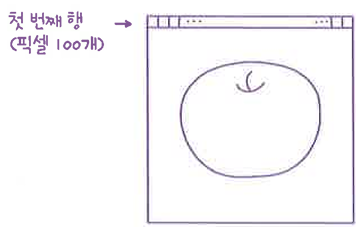

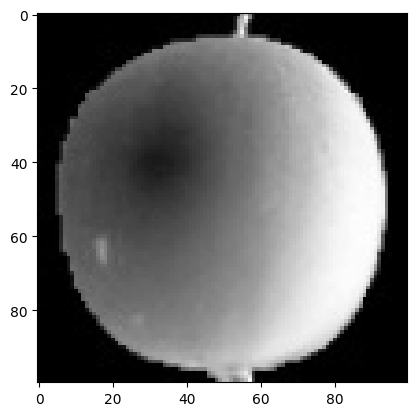

In [ ]:
#넘파이 배열로 저장된 이미지 쉽게 그릴 수 있음
plt.imshow(fruits[0], cmap='gray')
plt.show()

- 0에 가까울수록 검고, 숫자가 높을수록 밝다.

- 흑백 이미지는 사진으로 찍은 이미지를 넘파이 배열로 변환할 때 반전시킨다.
- 즉 사진의 흰 바탕(높은값)은 검은색(낮은 값)으로 만들고 실제 사과가 있어 짙은 부분(낮은 값)은 밝은색(높은 값)으로 바꾼다.
- 컴퓨터는 255에 가까운 흰색 바탕에 집중할 수 있기 때문에 우리의 관심인 사과로 바꾸기 위해서 반대로 만든 것이다.
- 컴퓨터는 픽셀값이 0이면 출력도 0이기 때문에 의미가 없다. 픽셀값이 높으면 출력값도 커지기 때문에 의미를 부여하게 되어서 컴퓨터는 255에 가까운 바탕에 집중하는 것이다.

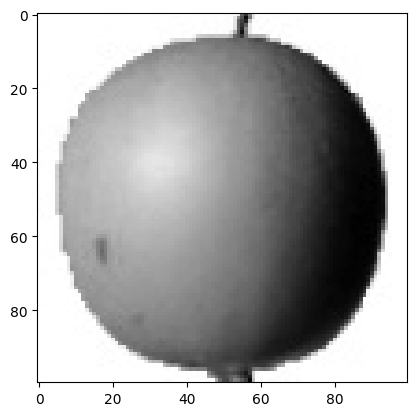

In [ ]:
#다시 반전하여 우리 눈에 보기 편하게 출력한 것, 즉 원본 사진
plt.imshow(fruits[0],cmap='gray_r')
plt.show()

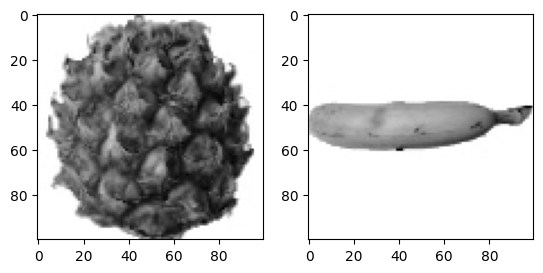

In [ ]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')
plt.show()

- subplots()함수는 여러개의 그래프를 배열처럼 쌓을 수 있도록 한다. 두 매개변수는 그래프를 쌓을 행과 열을 지정한다.
- axs는 2개의 서브 그래프를 담고 있는 배열이다.
- 이 데이터는 처음 100개 사과, 그 다음 100개 파인애플, 마지막 100개는 바나나이다.

In [ ]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

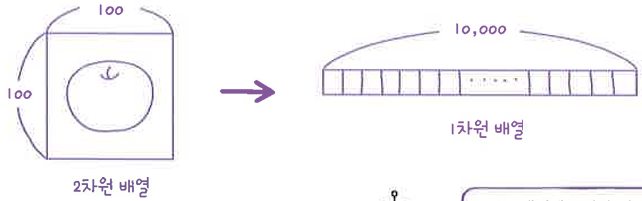

In [ ]:
print(apple.shape)

(100, 10000)


In [ ]:
print(apple.mean(axis=1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


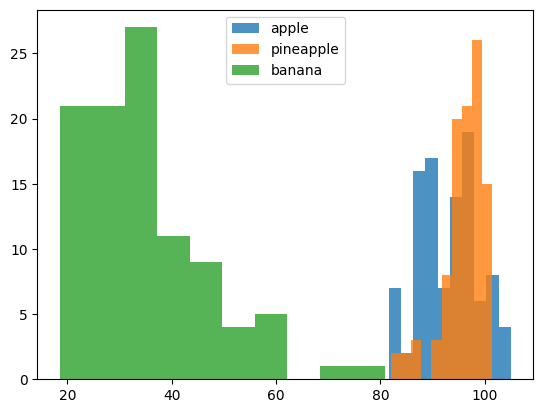

In [ ]:
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(['apple', 'pineapple','banana'])
plt.show()

- alpha 매개변수는 투명도 조절로 1보다 작으면 투명하게 할 수 있다.
- legend()함수로 어떤 과일의 히스토그램인지 범례를 만든다.

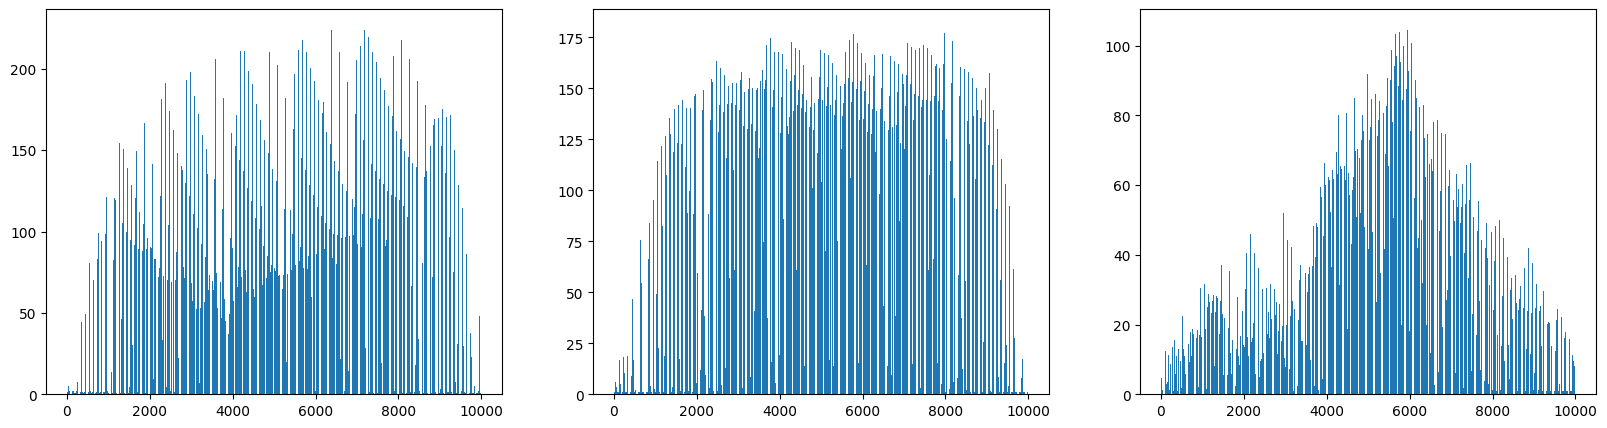

In [ ]:
#각 픽셀의 평균을 계산
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000),np.mean(apple,axis=0))
axs[1].bar(range(10000),np.mean(pineapple,axis=0))
axs[2].bar(range(10000),np.mean(banana,axis=0))
plt.show()

- bar()함수는 픽셀 평균값을 막대그래프로 그린다.

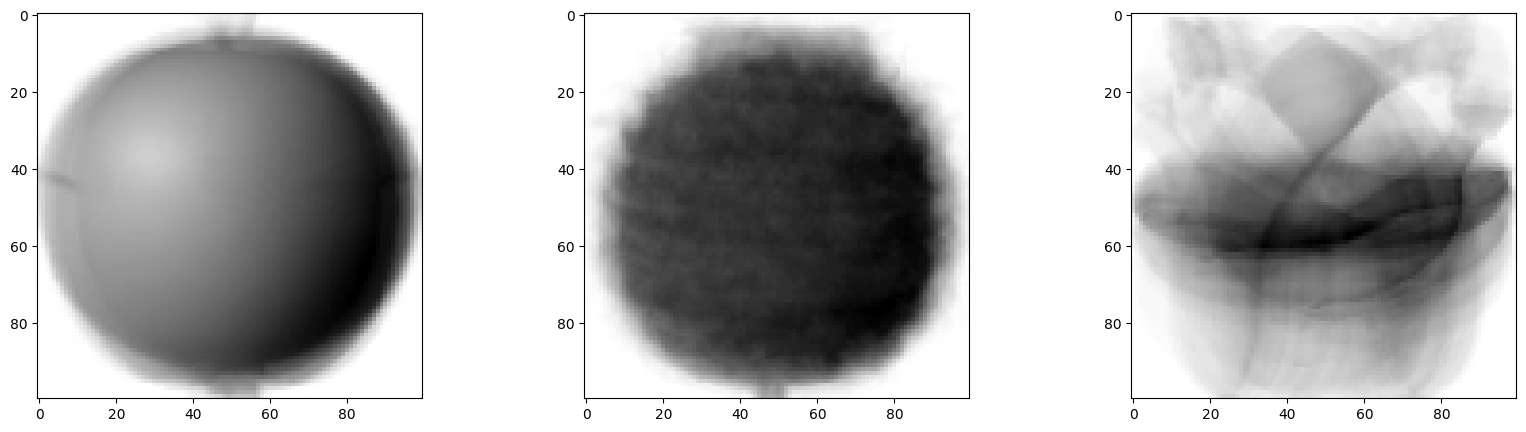

In [ ]:
apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple,axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)
fig,axs = plt.subplots(1,3,figsize=(20,5))
axs[0].imshow(apple_mean,cmap='gray_r')
axs[1].imshow(pineapple_mean,cmap='gray_r')
axs[2].imshow(banana_mean,cmap='gray_r')
plt.show()

- 픽셀 평균값을 100 X 100 크기로 바꿔서 이미지처럼 출력
- 픽셀을 평균 낸 이미지를 모든 사진을 합쳐 놓은 대표 이미지로 생각할 수 있다.

In [ ]:
abs_diff = np.abs(fruits - apple_mean) #절댓값 함수
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

(300,)


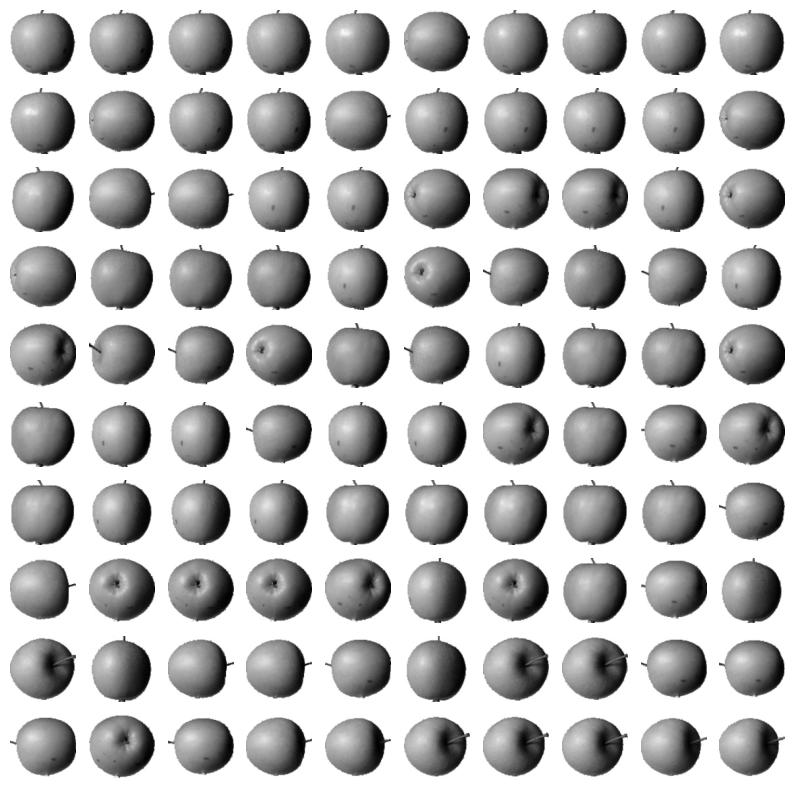

In [ ]:
abs_diff = np.abs(fruits - apple_mean) #절댓값 함수
abs_mean = np.mean(abs_diff, axis=(1,2))
apple_index = np.argsort(abs_mean) #작은 것에서 큰 순서대로 나열
fig, axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[apple_index[i*10+j]],cmap='gray_r')
    axs[i,j].axis('off')
plt.show()

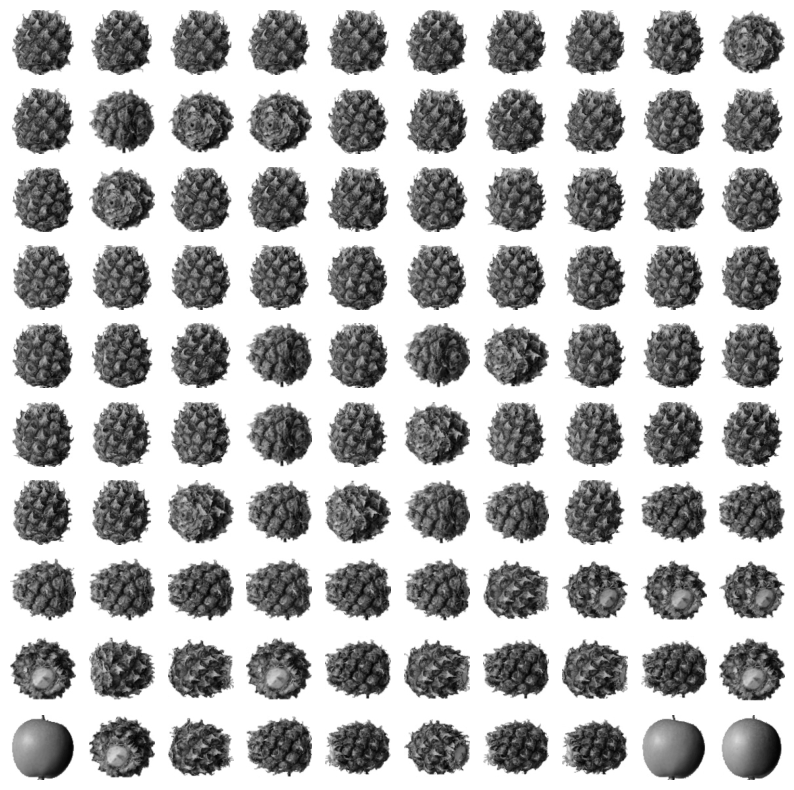

In [ ]:
abs_diff = np.abs(fruits - pineapple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

pineapple_index = np.argsort(abs_mean) #작은 것에서 큰 순서대로 나열
fig, axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[pineapple_index[i*10+j]],cmap='gray_r')
    axs[i,j].axis('off')
plt.show()

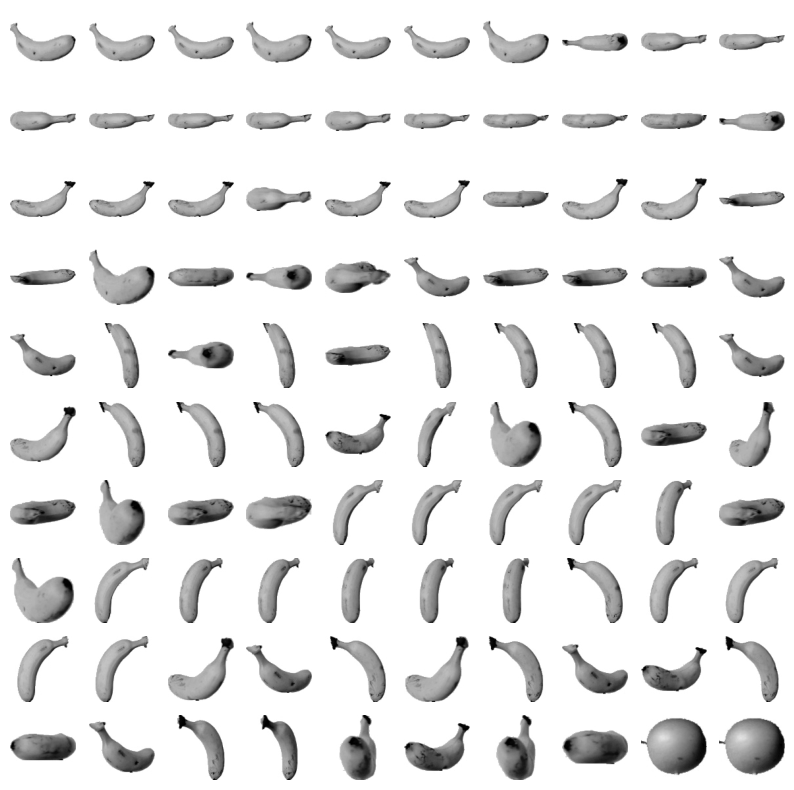

In [ ]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

banana_index = np.argsort(abs_mean) #작은 것에서 큰 순서대로 나열
fig, axs = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[banana_index[i*10+j]],cmap='gray_r')
    axs[i,j].axis('off')
plt.show()

- 군집: 비슷한 샘플끼리 하나의 그룹으로 모으는 대표적인 비지도 학습 작업
  - 클러스터: 군집 알고리즘으로 모은 샘플 그룹

#6-2. K-평균

- K-평균: 군집 알고리즘이 평균값을 자동으로 찾아준다.
- 클러스터 중심(센트로이드): 평균값이 클러스터의 중심에 위치

In [ ]:
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

--2024-12-30 11:43:11--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2024-12-30 11:43:11--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2024-12-30 11:43:11--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... conne

In [ ]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [ ]:
print(km.labels_) #군집된 결과

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


- labels_ 배열의 길이는 샘플 개수와 같다.
- n_clusters=3이기 때문에 labels_배열값은 0,1,2
- 레이블값과 레이블 순서에는 의미가 없다.

In [ ]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


- 첫 번째 클러스터(레이블 0)은 111개 샘플, 두 번째 클러스터(레이블 1)은 98개 샘플, 세 번째 클러스터(레이블 2)은 91개 샘플을 모았다.


In [ ]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr) #샘플의 개수

  rows = int(np.ceil(n/10)) #ceil은 무조건 올림

  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10 +j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

- ratio 기본값은 1

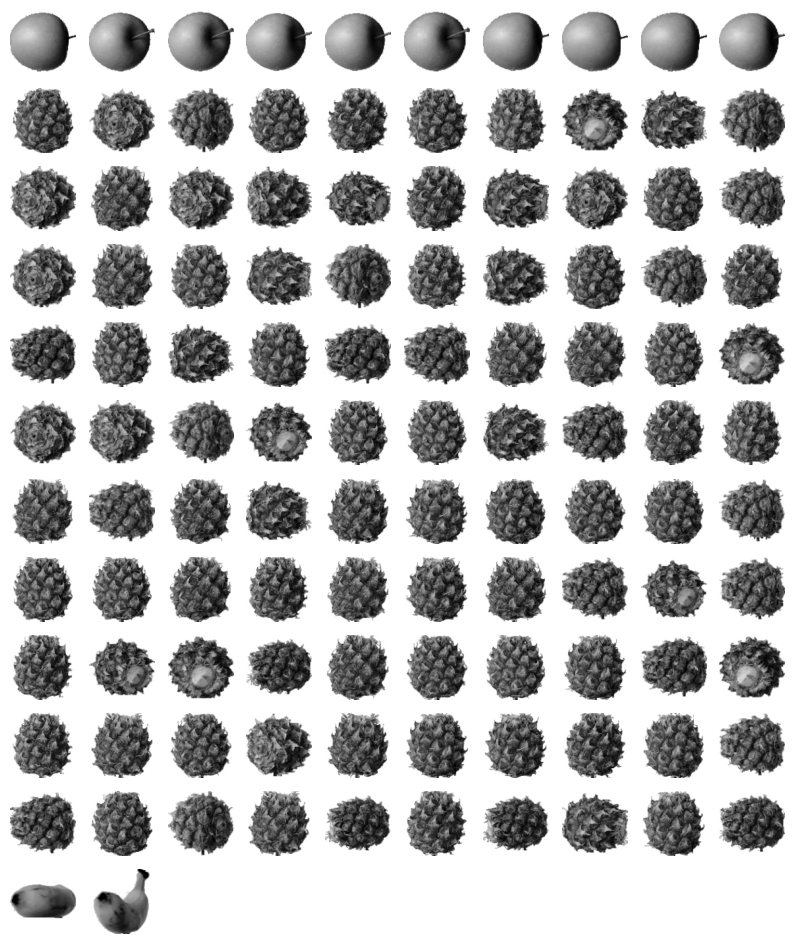

In [ ]:
draw_fruits(fruits[km.labels_==0])

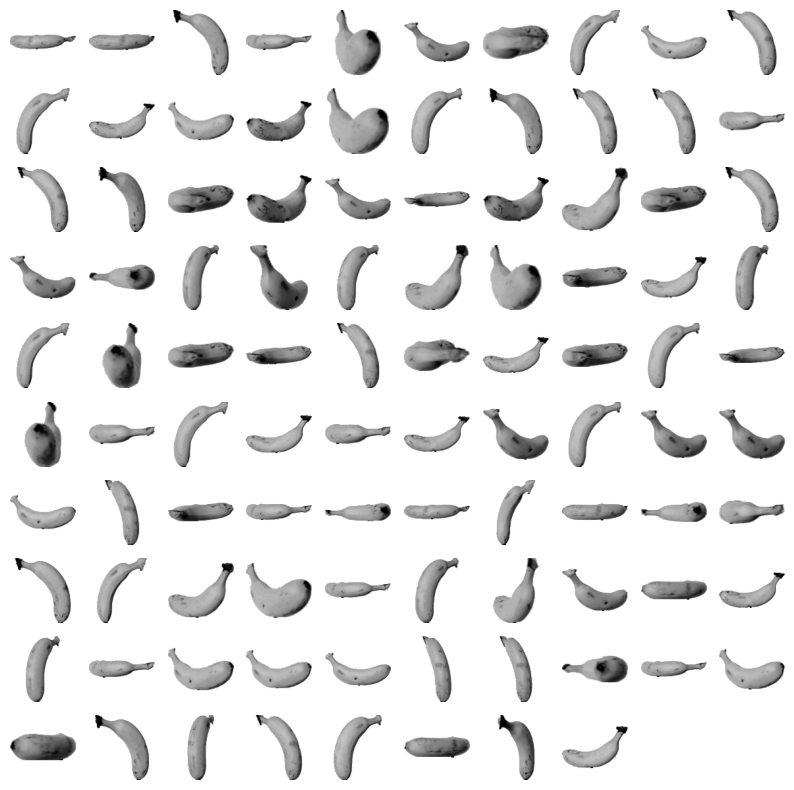

In [ ]:
draw_fruits(fruits[km.labels_==1])

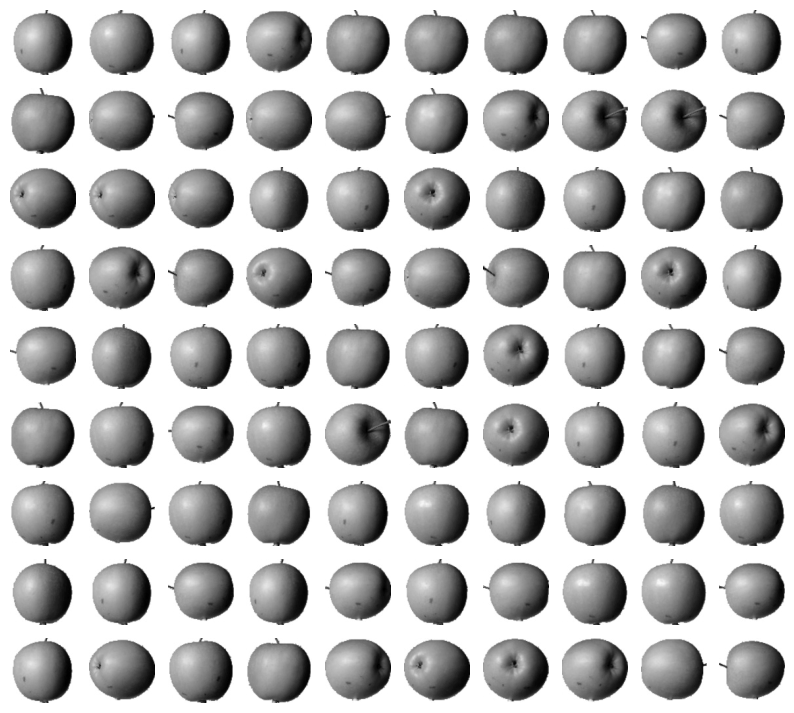

In [ ]:
draw_fruits(fruits[km.labels_==2])

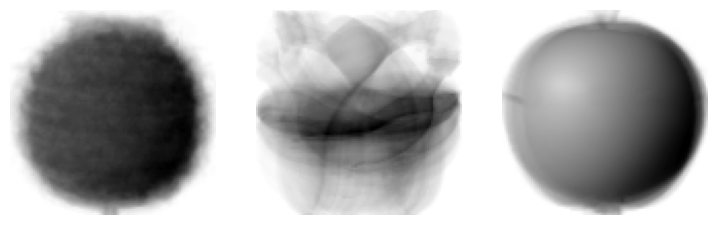

In [ ]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100), ratio=3)

- 클러스터 중심은 cluster_centers_ 속성에 저장되어 있다.

In [ ]:
 print(km.transform(fruits_2d[100:101])) #transform(): 클러스터 중심까지 거리로 변환

[[3400.24197319 8837.37750892 5279.33763699]]
